# Feature engineering

## Focus on time of various bids

In [71]:
# import 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [72]:
bids = pd.read_csv('Data/bids.csv')
bidder = pd.read_csv('Data/train.csv')

In [73]:
bidder.head(5)
bidder.shape

(2013, 4)

### Encoding
- 'pd.concat()' unisce le colonne bidder_id di df_train e df_test.
- 'unique()' restituisce una lista di valori univoci di bidder_id presenti in entrambi i dataset, eliminando duplicati.
- 'enumerate(unique_bidders)' associa un indice numerico (da 0 in poi) a ciascun valore unico di bidder_id.
- Successivamente viene creata la nuova colonna 'encoded_bidder_id' e viene riempita con i valori corrispondenti nella mappa

In [74]:
unique_bidders = pd.concat([bids['bidder_id'], bidder['bidder_id']]).unique()
bidder_mapping = {bidder_id: idx for idx, bidder_id in enumerate(unique_bidders)}
bids['encoded_bidder_id'] = bids['bidder_id'].map(bidder_mapping)
bidder['encoded_bidder_id'] = bidder['bidder_id'].map(bidder_mapping)

In [75]:
bids.drop('bidder_id',axis=1,inplace=True)
bidder.drop('bidder_id',axis=1,inplace=True)

In [ ]:
bids

,bid_id,auction,merchandise,device,time,country,ip,url,encoded_bidder_id
0,0,ewmzr,jewelry,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3,0
1,1,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c,1
2,2,wa00e,home goods,phone2,9759243157894736,py,112.54.208.157,vasstdc27m7nks3,2
3,3,jefix,jewelry,phone4,9759243157894736,in,18.99.175.133,vasstdc27m7nks3,3
4,4,jefix,jewelry,phone5,9759243157894736,in,145.138.5.37,vasstdc27m7nks3,4
...,...,...,...,...,...,...,...,...,...
7656329,7656329,3e64w,jewelry,phone91,9709222052631578,ru,140.204.227.63,cghhmomsaxi6pug,2957
7656330,7656330,xn0y0,mobile,phone236,9709222052631578,pl,24.232.159.118,wgggpdg2gx5pesn,3380
7656331,7656331,gja6c,sporting goods,phone80,9709222052631578,za,80.237.28.246,5xgysg14grlersa,2955
7656332,7656332,hmwk8,jewelry,phone349,9709222052631578,my,91.162.27.152,bhtrek44bzi2wfl,3049


In [77]:
bidder

,payment_account,address,outcome,encoded_bidder_id
0,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0,1309
1,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0.0,2397
2,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0.0,2514
3,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0.0,6527
4,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0.0,238
...,...,...,...,...
2008,a1f85275793c4a782f0a668711f41b927ivc9,e6882cf204a9482edd042b6e31791dfctxzx8,0.0,4823
2009,a3d2de7675556553a5f08e4c88d2c2286s1m2,b9b03d5a127eb07aeb9163cdcf524e1344ac9,0.0,6495
2010,a3d2de7675556553a5f08e4c88d2c22856leq,d02c2b288b8aabd79ff47118aff41a2dqwzwc,0.0,2209
2011,fd87037ce0304077079c749f420f0b4c54uo0,f030a221726fbcdfc4dc7dfd1b381a112hieq,0.0,5380


### Add the average number of bids a user placed per referring URL

In [78]:
# Label Encoding for url
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
bids["url"] = encoder.fit_transform(bids['url'])

# Group by bidder_id and url and count number of bids for every group
bids_per_url_train = bids.groupby(['encoded_bidder_id', 'url'])['bid_id'].count().reset_index(name='bid_count')

# Calculate the mean
average_bids_per_user_train = bids_per_url_train.groupby('encoded_bidder_id')['bid_count'].mean().reset_index(name='avg_bids_per_url')

In [79]:
average_bids_per_user_train

,encoded_bidder_id,avg_bids_per_url
0,0,3.712683
1,1,4.415286
2,2,7.891916
3,3,4.419524
4,4,7.236384
...,...,...
6609,6609,1.000000
6610,6610,1.000000
6611,6611,1.000000
6612,6612,1.000000


### Add the mean of the per-auction URL entropy
- Higher values of entropy suggest that the bidder's bidding behavior is spread across different auctions/URLs with a more uniform distribution.
- Lower values of entropy suggest that the bidder's activity is concentrated in specific auctions or URLs.

In [80]:
# Label Encoding for auction
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
bids["auction"] = encoder.fit_transform(bids['auction'])

# Group by bidder_id and auction and count number of url for every group
bids_per_auction_url_train = bids.groupby(['encoded_bidder_id', 'auction'])['url'].count().reset_index(name='url_per_auction_count')

def calculate_entropy(values):
	total = sum(values)
	probabilities = [count / total for count in values]
	return -sum(p * np.log2(p) for p in probabilities if p > 0)

# Calculate entropy for each bidder per auction
bids_per_auction_url_entropy_train = (
	bids_per_auction_url_train.groupby(['encoded_bidder_id'])['url_per_auction_count']
	.apply(calculate_entropy)
	.reset_index(name='url_entropy_per_auction')
)

In [81]:
bids_per_auction_url_entropy_train

,encoded_bidder_id,url_entropy_per_auction
0,0,6.158347
1,1,5.696760
2,2,6.494542
3,3,2.407953
4,4,2.440489
...,...,...
6609,6609,-0.000000
6610,6610,-0.000000
6611,6611,-0.000000
6612,6612,-0.000000


### Join new features extracted with bidder_train and bidder_test

In [82]:
from functools import reduce

# List of DataFrames to merge
dataframes_to_merge_train = [average_bids_per_user_train, bids_per_auction_url_entropy_train]

# Merge all DataFrames on a common column
for df_to_merge_train in dataframes_to_merge_train:
	bids = pd.merge(bids, df_to_merge_train, on='encoded_bidder_id', how='outer')

In [83]:
bids

,bid_id,auction,merchandise,device,time,country,ip,url,encoded_bidder_id,avg_bids_per_url,url_entropy_per_auction
0,0,6242,jewelry,phone0,9759243157894736,us,69.166.231.58,1553590,0,3.712683,6.158347
1,14,13552,jewelry,phone15,9759243263157894,au,134.243.148.253,1553590,0,3.712683,6.158347
2,106,7590,jewelry,phone80,9759243736842105,ke,227.231.81.211,1542107,0,3.712683,6.158347
3,152,12961,jewelry,phone41,9759243947368421,iq,140.231.164.76,1656691,0,3.712683,6.158347
4,155,10996,jewelry,phone102,9759244000000000,za,187.81.242.103,715635,0,3.712683,6.158347
...,...,...,...,...,...,...,...,...,...,...,...
7656329,7635939,12959,jewelry,phone771,9709128842105263,my,0.159.159.71,1201661,6609,1.000000,-0.000000
7656330,7637097,8324,jewelry,phone15,9709134105263157,id,221.143.27.57,1269224,6610,1.000000,-0.000000
7656331,7639758,5425,sporting goods,phone142,9709146315789473,in,108.54.134.235,1657160,6611,1.000000,-0.000000
7656332,7651414,14279,mobile,phone21,9709200631578947,in,95.158.193.99,1308191,6612,1.000000,-0.000000


### Bids:
Ora il nuovo dataframe "bids" con chiave "bid_id"

In [84]:
bids.shape

(7656334, 11)

### Training and test with new features

### First:
- drop the old features
- encode 'merchandise'

In [85]:
# Join between bidders_train and df_train
# df_with_new_features = pd.merge(bids, bidder, on='encoded_bidder_id', how='inner')
bids.drop(["bid_id","auction", "device", "time", "country", "ip", "url"], axis=1, inplace=True)

# Encoding 'merchandise'
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
bids["merchandise"] = encoder.fit_transform(bids['merchandise'])

bids


,merchandise,encoded_bidder_id,avg_bids_per_url,url_entropy_per_auction
0,6,0,3.712683,6.158347
1,6,0,3.712683,6.158347
2,6,0,3.712683,6.158347
3,6,0,3.712683,6.158347
4,6,0,3.712683,6.158347
...,...,...,...,...
7656329,6,6609,1.000000,-0.000000
7656330,6,6610,1.000000,-0.000000
7656331,9,6611,1.000000,-0.000000
7656332,7,6612,1.000000,-0.000000


### Check if there are any Nan in 'bids'

In [86]:
bids.dropna(inplace = True)
bids

,merchandise,encoded_bidder_id,avg_bids_per_url,url_entropy_per_auction
0,6,0,3.712683,6.158347
1,6,0,3.712683,6.158347
2,6,0,3.712683,6.158347
3,6,0,3.712683,6.158347
4,6,0,3.712683,6.158347
...,...,...,...,...
7656329,6,6609,1.000000,-0.000000
7656330,6,6610,1.000000,-0.000000
7656331,9,6611,1.000000,-0.000000
7656332,7,6612,1.000000,-0.000000


### Then:
- train a Decision Tree model and see what happens

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Convert 'outcome' in type int
bidder['outcome'] = bidder['outcome'].astype(int)

# First split data in the bidder csv, to avoid to separate bidder splitting on the bids
X_bidder = bidder.drop(['outcome', 'address', 'payment_account'],axis=1)
y_bidder = bidder['outcome']

X_train_bidder, X_val_bidder, y_train_bidder, y_val_bidder = train_test_split(X_bidder, y_bidder, test_size=0.3, random_state=42, stratify=y_bidder)

df_train = pd.merge(bids, pd.concat([X_train_bidder, y_train_bidder], axis=1), on='encoded_bidder_id', how='inner')
df_val = pd.merge(bids, pd.concat([X_val_bidder, y_val_bidder], axis=1), on='encoded_bidder_id', how='inner')

# if i put 'left' on the merge my total lenght of (train + val) / 2 should return the same value of the original 'bids' lenght --> ho controllato ed è cosi
print("Controll correctness: ")
print("'Bids' length before split: " + str(bids.shape[0]))
print("'Bids' length after split: " + str(df_train.shape[0] + df_val.shape[0]))


Controll correctness: 
'Bids' length before split: 7656334
'Bids' length after split: 3071224


### Controll correctness
- 'Bids' length before split: 7656334
- 'Bids' length after split: 3071224

That means that some bidders do not have bids.

### Check for null

In [101]:
# Check for null
for column_train, column_val in zip(df_train.columns, df_val.columns):
	if df_train[column_train].isnull().sum() > 0:
		print("!NULL!" + str(column_train) + " - Train")
	if df_val[column_val].isnull().sum() > 0:
		print("!NULL!" + str(column_val) + " - Val")

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94    820405
           1       0.14      0.15      0.14     53159

    accuracy                           0.89    873564
   macro avg       0.54      0.54      0.54    873564
weighted avg       0.90      0.89      0.89    873564



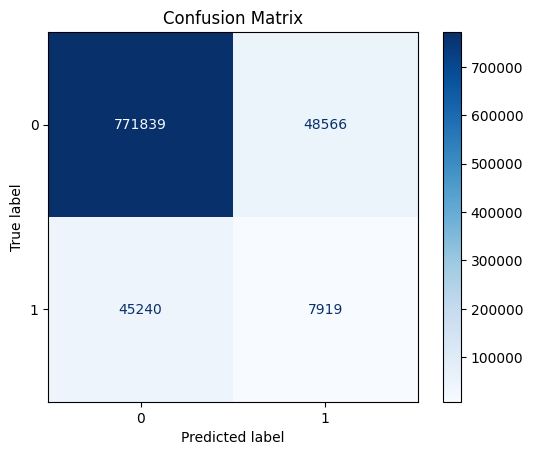

In [105]:
X_train = df_train.drop(['outcome'],axis=1)
y_train = df_train['outcome']
X_val = df_val.drop(['outcome'],axis=1)
y_val = df_val['outcome']

decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
y_pred = decision_tree_model.predict(X_val)

cr_new_features = classification_report(y_val, y_pred)
print("Classification Report:")
print(cr_new_features)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
conf_matrix = confusion_matrix(y_val, y_pred)
cm_dt_with_new_features = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=decision_tree_model.classes_)
cm_dt_with_new_features.plot(cmap="Blues", values_format='d')

import os
from datetime import datetime
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
output_dir = f"Outputs/output_{timestamp}"
os.makedirs(output_dir, exist_ok=True)
image_path = os.path.join(output_dir, 'Confusion Matrix.png')

import matplotlib.pyplot as plt
plt.title('Confusion Matrix')
plt.savefig(image_path, dpi=300, bbox_inches='tight')

class_report_path = os.path.join(output_dir, 'Classification_report.txt')
with open(class_report_path, 'w') as f:
    f.write(cr_new_features)

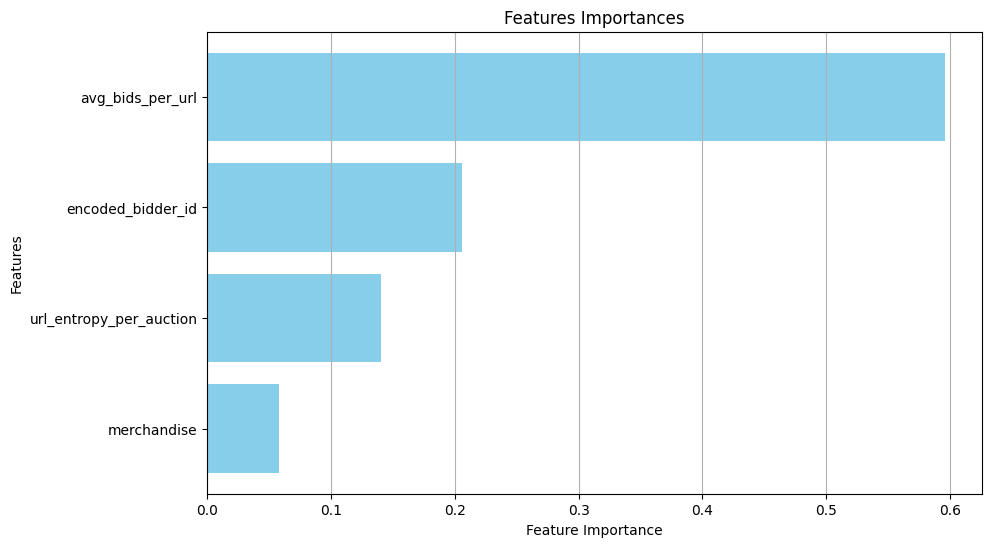

In [106]:
import numpy as np

# Ottieni le importanze delle feature
feature_importances = decision_tree_model.feature_importances_

# Ordina le feature per importanza decrescente
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_features = X_train.columns[sorted_idx]
sorted_importances = feature_importances[sorted_idx]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, color="skyblue")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importances in DecisionTreeClassifier")
plt.gca().invert_yaxis()  # Inverti l'asse Y per avere la feature più importante in alto
plt.grid(axis='x')

fea_importance_path = os.path.join(output_dir, 'Feature_importances.png')
plt.title('Features Importances')
plt.savefig(fea_importance_path, dpi=300, bbox_inches='tight')

In [22]:
# from fep import FEP, load_features
# pipeline = FEP("prova.csv")
# pipeline.save_features(df_train)